# Working with Data

## One dimensional Data

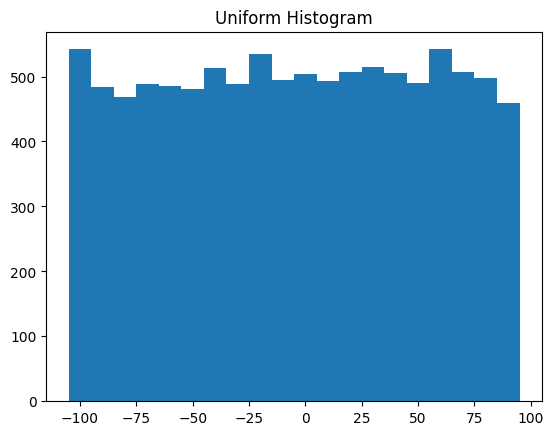

In [11]:
from typing import List, Dict  
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point:float, bucket_size:float)-> Dict[float,int]:
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size:float)-> Dict[float,int]:
    return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points:List[float], bucket_size:float,title:str= ""):
    histogram = make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    # plt.show()

# For example, consider the two following sets of data:

import random

# The CDF for the normal distribution cannot be written in an "elementary" manner, but we can write it using python's math.erf error function

def normal_cdf(x:float, mu:float = 0, sigma:float =1)->float:
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

def inverse_normal_cdf(p:float,
                       mu:float = 0,
                       sigma:float =1,
                       tolerance:float = 0.00001)->float:
    """ Find approximate inverse using binary search """
    # if not standard, compute standard and rescale
    if mu!=0 or sigma != 1:
        return mu+ sigma*inverse_normal_cdf(p, tolerance=tolerance)
    low_z=-10.0                   # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                   # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z+hi_z)/2                # consider the midpoint
        mid_p = normal_cdf(mid_z)             # the CDF's value there
        if mid_p < p:
            low_z = mid_z                     # midpoint too low search above it
        else:
            hi_z = mid_z                      # midpoint too high, search below it
    return mid_z


# uniform between -100 and 100
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

""" Both have mean close to 0 and standard deviations close to 58. However, they have very different distribution """

plot_histogram(uniform,10,"Uniform Histogram")


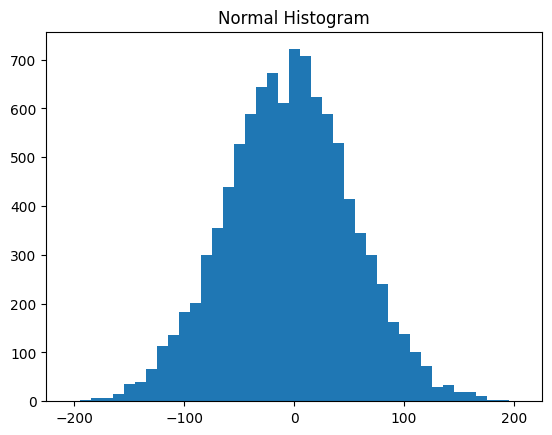

In [4]:
plot_histogram(normal,10,"Normal Histogram")

- In this case two distributions have pretty different max and min, but even knowing that wouldn't have been sufficient to understand how they differed

## Two Dimensions

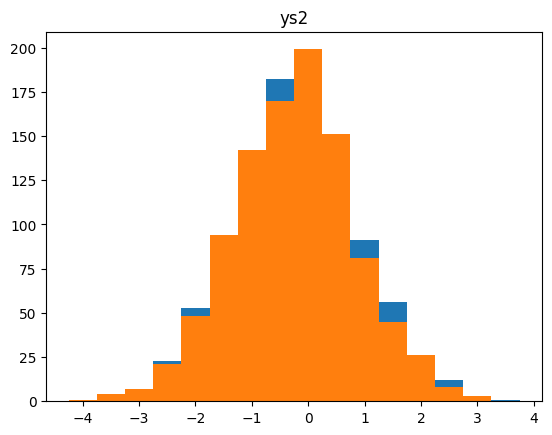

In [14]:
def random_normal()-> float:
    """ Returns a random draw from standard normal distribution """
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x+random_normal()/2 for x in xs]
ys2 = [-x + random_normal()/2 for x in xs]

plot_histogram(ys1,0.5,"ys1")
plot_histogram(ys2,0.5,"ys2")

- But each has very different joint distribution with xs

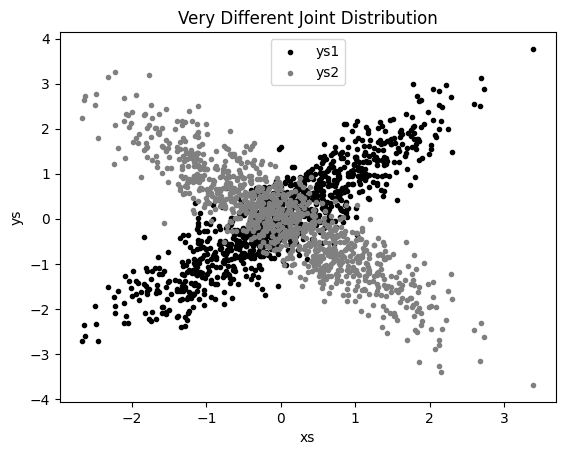

In [17]:
plt.scatter(xs,ys1,marker='.',color='black', label="ys1")
plt.scatter(xs,ys2,marker='.',color='gray',label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distribution")
plt.show()

#### Below code is from chapter 4 and chapter 5 

In [24]:
from typing import Callable
Vector = List[float]
Matrix = List[Vector]

def make_matrix(num_row:int,
                num_col:int,
                entry_fn: Callable[[int,int], float])-> Matrix:
    return[[entry_fn(i,j)
           for j in range(num_col)]
           for i in range(num_row)]
def mean(xs: List[float])-> float:
    return sum(xs)/len(xs)

def variance(xs:List[float])->float:
    assert len(xs) >= 2 , "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return(sum_of_squares(deviations)/(n-1))

def sum_of_squares(xs:List[float])-> float:
    return sum(x_i*x_i for x_i in xs)

def dot(xs:List[float],ys:List[float]):
    return sum(x_i*y_i for x_i,y_i in zip(xs,ys))
def de_mean(xs:List[float]) -> List[float]:
    x_bar = mean(xs)
    return[x-x_bar for x in xs]
def standard_deviation(xs:List[float])-> float:
    ''' The standard deviation is the square root of the variance '''
    return math.sqrt(variance(xs))

def covariance(xs:List[float],ys:List[float])-> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    n = len(xs)
    return dot(de_mean(xs), de_mean(ys)) / (n-1)

def correlation(xs:List[float], ys:List[float])->float:
    ''' Measures how much xs and ys vary in tandem about their means '''
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x>0 and stdev_y>0:
        return covariance(xs,ys) / stdev_x / stdev_y
    else:
        return 0 

## Many Dimensions

- with many dimensions, we see how all the dimensions realate to one another. A simple approach to look at the `correlation matrix` in which the entry in row (i) and column(j) is the correlation between the ith dimension and the jth dimension of the data

In [ ]:

def correlation_matrix(data: List[Vector])->Matrix:
    def correlation_ij(i:int, j: int)-> float:
        return correlation(data[i],data[j])
    
    return make_matrix(len(data),len(data),correlation_ij)


num_friends = [100, 55, 66, 75, 32, 75, 23]
daily_hours = [1.5, 2.0, 0.5, 3.0, 4.5, 2.5, 1.0]

data = [num_friends, daily_hours]
matrix = correlation_matrix(data)
print(matrix)



[[0.9999999999999999, -0.18767918106376824], [-0.18767918106376824, 1.0]]


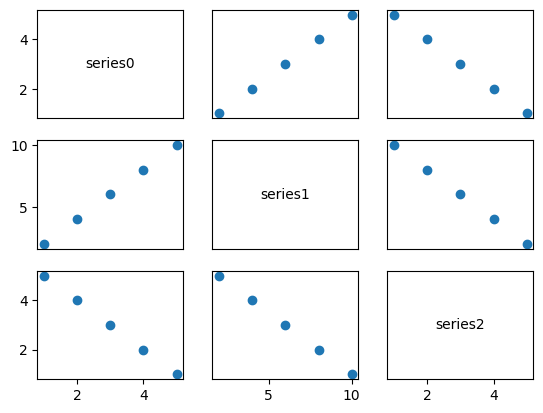

In [8]:

# three small data series
A = [1, 2, 3, 4, 5]
B = [2, 4, 6, 8, 10]   # strongly related to A (positive)
C = [5, 4, 3, 2, 1]    # opposite of A (negative)

corr_data = [A, B, C]
num_vectors  = len(corr_data)
fig,ax = plt.subplots(num_vectors,num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i!=j:
            ax[i][j].scatter(corr_data[j],corr_data[i])

        # unless i == j, in that case we show the series name
        else:
            ax[i][j].annotate(
                "series" + str(i), (0.5,0.5),xycoords = 'axes fraction',ha="center",va="center"
            )

        # then hide axis labels except left and bottom charts 
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because their charts only  have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()



## Using NamedTuples

In [19]:
import datetime

stock_price = {'closing_price':102.06, 'data':datetime.date(2014,8,29), 'symbol':'AAPL'}

from collections import namedtuple

StockPrice = namedtuple('StockPrice',['symbol','date','closing_price'])
price = StockPrice('MSFT',datetime.date(2018,12,14),106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03


from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
     """ It's a class, so we can add methods too """
     return  self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL'] 
    
price = StockPrice('MSFT', datetime.date(2018,12,14),106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

#### Dataclasses

In [18]:
from dataclasses import dataclass
import datetime

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price:float

    def is_high_tech(self) -> bool:
        """ It's a class we can add methods too """
        return self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL']
    
price2  = StockPrice2("MSFT",datetime.date(2018,12,14),106.03)
assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

# As mentioned, the big difference is that we can modify a dataclass instance's values

# stock split
price2.closing_price /= 2
assert price2.closing_price == 53.015

price2.cosing_price = 75     #oops


#### Cleaning and Munging

In [ ]:
from dateutil.parser import parse
from typing import List

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                    date= parse(date).date(),
                    closing_price=float(closing_price))

stock = parse_row(["MSFT","2018-12-14","106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018,12,14)
assert stock.closing_price == 106.03

""" What if there is bad data? A float value that doesn't actually represent a number? """
from typing import Optional
import re 

def try_parse_row(row:List[str]) -> Optional[StockPrice]:
    symbol,date_, closing_price_ = row

    # stock symbol should be all captital letter
    if not re.match(r"^[A-Z]+$",symbol):
        return None
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0","2018-12-14","106.03"]) is None
assert try_parse_row(["MSFT","2018-12--14","106.03"]) is None
assert try_parse_row(["MSFT","2018-12-14","x"]) is None

# But should return same as before if data is good 
assert try_parse_row(["MSFT","2018-12-14","106.03"]) == stock


- For example, if we have comma-delimited stock prices with bad data:
  
AAPL,6/20/2014,90.91<br>
MSFT,6/20/2014,41.68<br> 
FB,6/20/3014,64.5<br>
AAPL,6/19/2014,91.86<br> 
MSFT,6/19/2014,n/a <br> 
FB,6/19/2014,64.34 <br>
     

In [ ]:
import csv 
data: List[StockPrice] = []

with open("comma_delimated_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

## Manipulating Data


In [ ]:
max_appl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")

""" To know the highest-ever closing prices for each stock """

from collections import defaultdict
max_prices: Dict[str,float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol,sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price


# Percent change
from typing import List
from collections import defaultdict

# collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

prices = {symbol:sorted(symbol_prices) for symbol, symbol_prices in price.items()}

def pct_change(yesterday:StockPrice, today: StockPrice)-> float:
    return today.closing_price/yesterday.closing_price  -1

# day-over-day changes

class DailyChange(NamedTuple):
    symbol:str
    data: datetime.date
    pct_change: float
def day_over_day_changes(prices: List[StockPrice])-> List[DailyChange]:
    """ Assumes prices are for one stock and are in order """
    return [DailyChange(symbol=today.symbol,
                        date = today.date,
                        pct_change = pct_change(yesterday,today))
                        for yesterday, today in zip(prices,price[1:])]

all_changes  = [change
                for symbol_prices in prices.values()
                for change in day_over_day_changes(symbol_prices)]

# To find the largest and smallest 
max_change  = max(all_changes,key=lambda change: change.pct_change)
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997,8,6)
assert 0.33 < max_change.pct_change < 0.34

min_change = min(all_changes,key=lambda change: change.pct_change)
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000,9,29)
assert -0.52 < max_change.pct_change < -0.51


# To find which month is best to invest in tech stocks

changes_by_month = List[DailyChange] = {month:[] for month in range(1,13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)


avg_daily_change = {
    month:sum(change.pct_change for change in changes)/len(changes)
    for month,changes in changes_by_month.item()
}


assert avg_daily_change[10] == max(avg_daily_change.value())

## Rescaling

- If changing units can change results then sometimes we have to rescale our data, so that each dimension has mean 0 and standard deviation 1. This effectively gets rid of the units,converting each dimension to "standard deviations from the mean"

In [ ]:
from typing import Tuple

def vector_sum(vectors: List[Vector])->Vector:
    assert vectors, "No Vectors"
    num_len = len(vectors[0])
    assert all(num_len == len(v) for v in vectors),"different sizes"
    return [sum(vector[i] for vector in vectors) for i in range(num_len)]
  

def vector_mean(vectors: List[Vector])-> Vector:
    num_elements = len(vectors)
    return [(1/num_elements)*i for i in vector_sum(vectors)]


def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """ Returns the mean and standard deviation for each position """
    dim = len(data[0])

    means  = vector_mean(data)
    stdevs  = [standard_deviation(vector[i] for vector in data)
               for i in range(dim)]
    return means,stdevs

vectors =  [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means,stdevs = scale(vectors)
assert means == [-1,0,1]
assert stdevs == [2,1,0]

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has mean 0 and standard deviaiton 1.
    (Leaves a position as is if its standard deviation is 0)
    """

    dim = len(data[0])
    means,stdevs = scale(data)

   # Make copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
      for i in range(dim):
        if stdevs[i]>0:
            v[i]  = (v[i] - means[i])/stdevs[i]

    return rescaled

means,stdevs = scale(rescale(vectors))
assert means == [0,0,1]
assert stdevs == [1,1,0]

#### An Aside: tqdm

- Computations take long time, so you need to see progress and how long you should wait.

- One way of doing this is `tqdm` library that generate custom progress bars

- To install use:
   `python -m pip install tqdm`

   If version is of python 3.13, then try above command or use below:
   `python -m pip install --upgrade tqdm`
   

or

   `python -m pip install --upgrade pip ` 



   `python -m pip install tqdm`



In [3]:
import tqdm,random
for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


In [4]:
from typing import List
def primes_up_to(n:int) -> List[int]:
    primes=[2]

    with tqdm.trange(3,n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i%p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(100_00)

1229 primes: 100%|██████████| 9997/9997 [00:04<00:00, 2205.28it/s]


#### Principle Component Analysis (PCA)

- PCA converts D-dimensional data into K-dimensional data, where K < D.

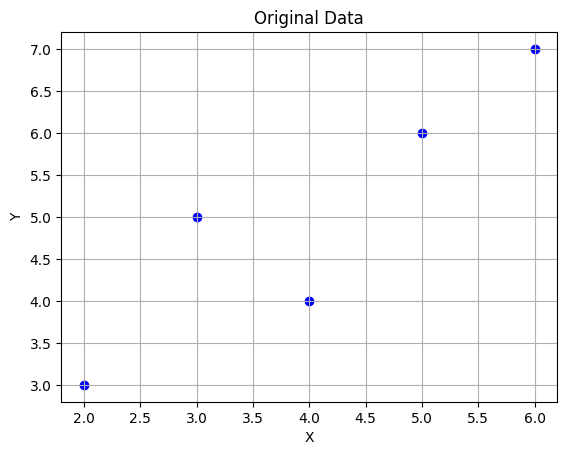

In [10]:
data = [
    [2, 3],
    [3, 5],
    [4, 4],
    [5, 6],
    [6, 7]
]

import matplotlib.pyplot as plt

x = [p[0] for p in data]
y = [p[1] for p in data]

plt.scatter(x, y, color='blue')
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

from typing import List
Vector = List[float]

# Helper: subtract two vectors
def subtract(v: Vector, w: Vector) -> Vector:
    return [v_i - w_i for v_i, w_i in zip(v, w)]

# Compute mean vector
def vector_mean(data: List[Vector]) -> Vector:
    n = len(data)
    dim = len(data[0])
    return [sum(data[i][j] for i in range(n)) / n for j in range(dim)]



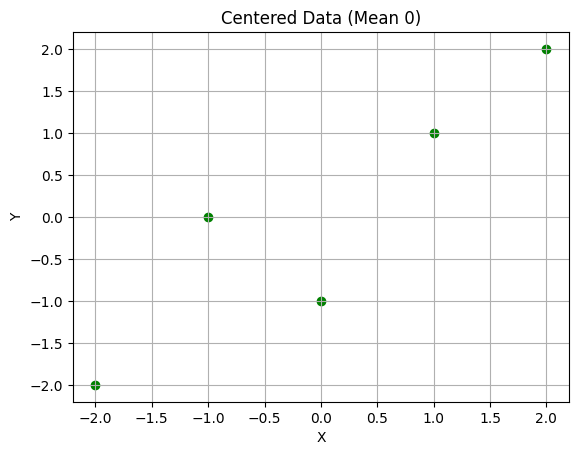

In [11]:
# Center data
  ## Each dimension now has mean 0
  ## This ensures that PCA focuses on variation, not location
def de_mean(data: List[Vector]) -> List[Vector]:
    mean = vector_mean(data)
    return [subtract(v, mean) for v in data]

centered_data = de_mean(data)

x_centered = [p[0] for p in centered_data]
y_centered = [p[1] for p in centered_data]

plt.scatter(x_centered, y_centered, color='green')
plt.title("Centered Data (Mean 0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


100%|██████████| 50/50 [00:00<00:00, 67237.96it/s]

First principal component: [0.7071067811865476, 0.7071067811865476]


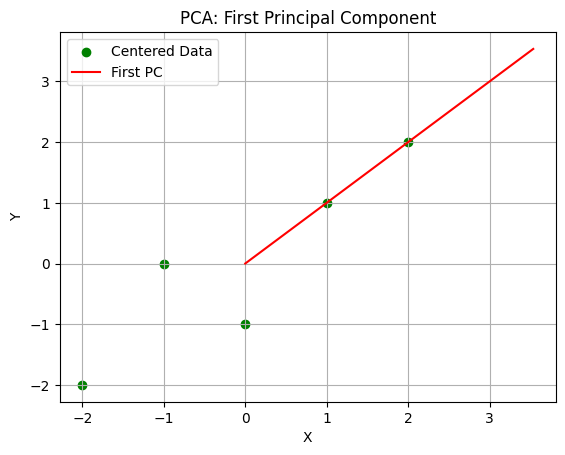

In [ ]:
# Unit Direction

from math import sqrt

def magnitude(v: Vector) -> float:
    return sqrt(sum(v_i**2 for v_i in v))

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

# Variance along direction

def dot(v: Vector, w: Vector) -> float:
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def directional_variance(data: List[Vector], w: Vector) -> float:
    w_dir = direction(w)
    return sum(dot(v, w_dir)**2 for v in data)

# Gradient variance
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data) for i in range(len(w))]

# Gradient step

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    return [v_i + step_size * g_i for v_i, g_i in zip(v, gradient)]

import tqdm

def first_principal_component(data: List[Vector],
                              n: int = 50,
                              step_size: float = 0.01) -> Vector:
    guess = [1.0 for _ in data[0]]  # start guess
    
    for _ in tqdm.trange(n):
        dv = directional_variance(data, guess)
        grad = directional_variance_gradient(data, guess)
        guess = gradient_step(guess, grad, step_size)
    
    return direction(guess)

pc1 = first_principal_component(centered_data)
print("First principal component:", pc1)

plt.scatter(x_centered, y_centered, color='green', label='Centered Data')

# Draw principal component line through origin
scale = 5  # just to make it visible
plt.plot([0, pc1[0]*scale], [0, pc1[1]*scale], color='red', label='First PC')

plt.title("PCA: First Principal Component")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


""" Using PCA, we converted 2D data into 1D data by projecting the points onto the first principal component. """


